In [62]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
from random import randint
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
from keras.models import load_model
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
import tensorflow as tf
plt.style.use('ggplot')

In [34]:
targets = []
features = []
print('start parsing ...')
files = glob.glob('Retinaldata/train/*.jpg')
random.shuffle(files)
print('parsing ok.')

for file in files:
    features.append(np.array(Image.open(file).resize((100, 100))))
    target = [1, 0] if "amd" in file else [0, 1]
    targets.append(target)

features = np.array(features)
targets = np.array(targets)

print (features.shape)
print (targets.shape)


start parsing ...
parsing ok.
(160, 100, 100, 3)
(160, 2)


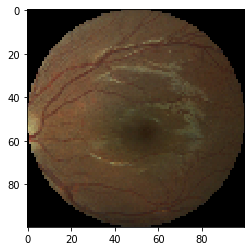

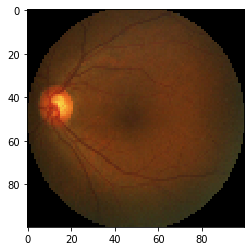

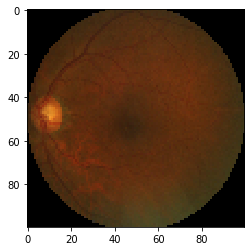

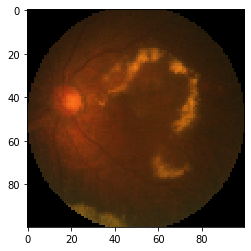

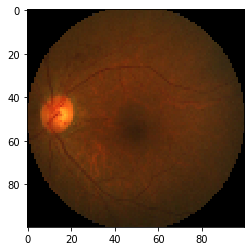

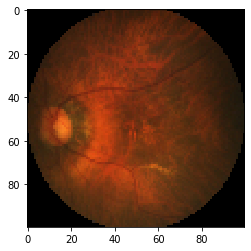

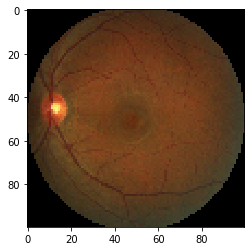

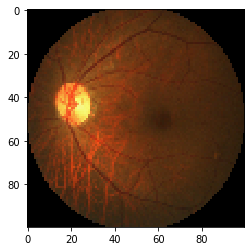

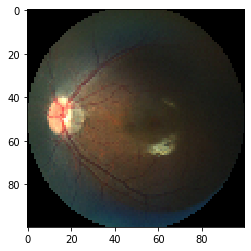

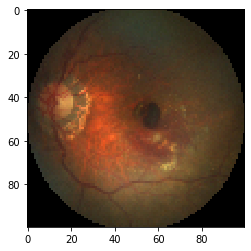

In [36]:
for idx in [randint(0, len(features)) for _ in range(10)]:
    plt.imshow(features[idx])
    plt.show()

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(features,
                        targets, test_size=0.3, random_state=42)

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(8, 8), strides=(1, 1),
                 activation='relu', input_shape=(100, 100, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(215, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      6176      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       819456    
__________

In [39]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),
              loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train,
          batch_size=100,
          epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid))

Train on 112 samples, validate on 48 samples
Epoch 1/50
112/112 [==============================] - 1s 10ms/step - loss: 0.0216 - acc: 0.9955 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 2/50
112/112 [==============================] - 1s 10ms/step - loss: 2.0188e-04 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 3/50
112/112 [==============================] - 1s 10ms/step - loss: 7.6097e-05 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 4/50
112/112 [==============================] - 1s 10ms/step - loss: 4.1183e-04 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 5/50
112/112 [==============================] - 1s 10ms/step - loss: 7.2309e-04 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 6/50
112/112 [==============================] - 1s 10ms/step - loss: 0.0249 - acc: 0.9911 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 7/50
112/112 [==============================] - 1s 10ms/step - loss: 8.1691e-04 - acc: 1.0000 - val_loss: 1.096

In [58]:
model.save('model.h5')
model.save_weights('model_w.h5')

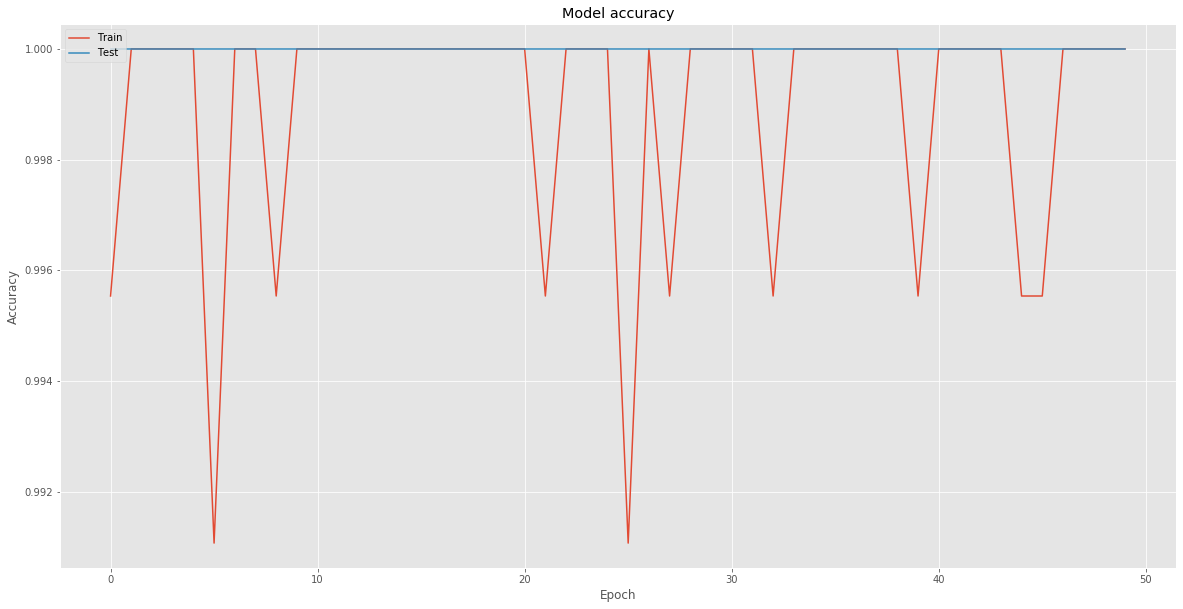

In [56]:
plt.figure(figsize=(20,10)) 
plt.style.use('ggplot')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



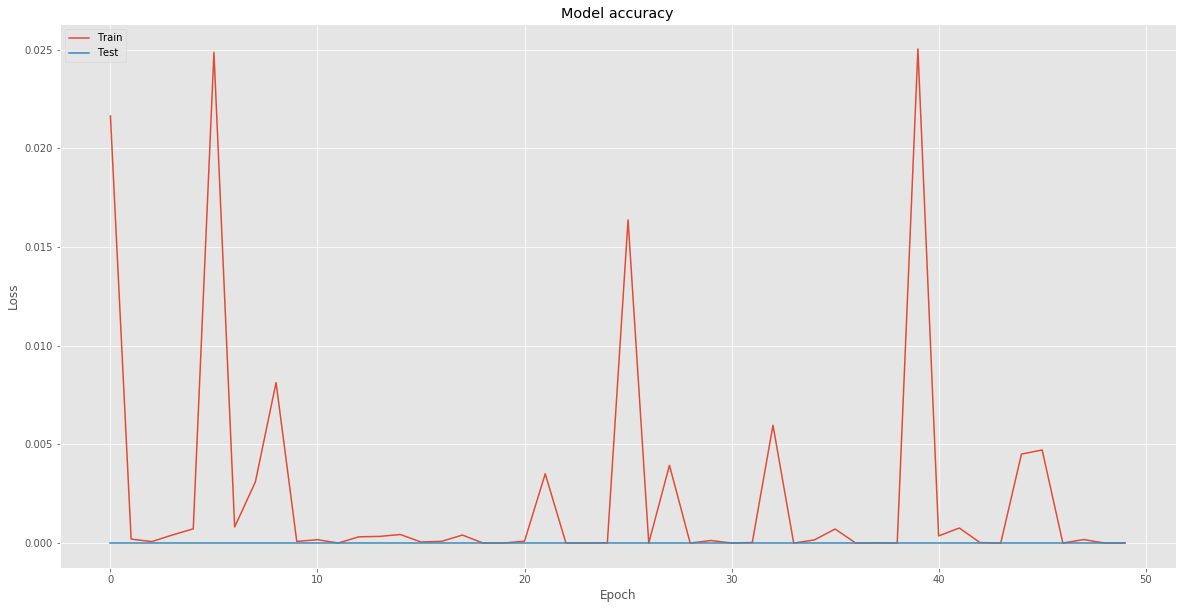

In [57]:
plt.figure(figsize=(20,10)) 
plt.style.use('ggplot')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [64]:
img_width, img_height = 100, 100
input_shape = (img_width, img_height, 3)

In [65]:
test_model = load_model('model.h5')

In [73]:
path = 'Retinaldata/test/A0014.jpg'
img = load_img(path, False, target_size = (img_width, img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = test_model.predict_classes(x)
prob = test_model.predict_proba(x)
print(pred)
print(prob)
if pred == [[0]]:
    print('AMD :/')
else:
    print('NonAMD')

[1]
[[3.63244e-17 1.00000e+00]]
NonAMD
